In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import __all__

In [7]:
df=pd.read_csv('credit scoring.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_17556\3761587702.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('credit scoring.csv')


In [ ]:
# Convert Credit_History_Age to numeric (months) if already in numeric form
import re

def convert_credit_age(value):
    if pd.isna(value):
        return None
    years = int(re.search(r'(\d+)\s+Years', value).group(1))
    months = int(re.search(r'(\d+)\s+Months', value).group(1))
    return years * 12 + months

df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_credit_age)

# Ensure Num_of_Delayed_Payment is integer
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce').fillna(0).astype(int)

# Convert Monthly_Balance to float
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce').astype(float)

# Convert Amount_invested_monthly to float
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce').astype(float)






In [9]:
name_map = df.groupby("Customer_ID")["Name"].apply(lambda x: x.dropna().iloc[0] if x.notna().any() else None)

# Fill missing names using this mapping
df["Name"] = df.apply(
    lambda row: name_map[row["Customer_ID"]] if pd.isna(row["Name"]) else row["Name"],
    axis=1
)


monthlysalary_map = df.groupby("Customer_ID")["Monthly_Inhand_Salary"].apply(lambda x: x.dropna().iloc[0] if x.notna().any() else None)

# Fill missing names using this mapping
df["Monthly_Inhand_Salary"] = df.apply(
    lambda row: monthlysalary_map[row["Customer_ID"]] if pd.isna(row["Monthly_Inhand_Salary"]) else row["Monthly_Inhand_Salary"],
    axis=1
)
# df['Type_of_Loan'].fillna(df['Type_of_Loan'].mode()[0], inplace=True)
# df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'] \
#                                    .transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))




# df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median(), inplace=True)
# df['Credit_History_Age'].fillna(df['Credit_History_Age'].median(), inplace=True)
# df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median(), inplace=True)


df['Monthly_Balance']=pd.to_numeric(df['Monthly_Balance'],errors='coerce')
# df['Monthly_Balance'].fillna(df['Monthly_Balance'].median(),inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Credit_Score']=le.fit_transform(df['Credit_Score'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [17]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce').astype(float)
df['Outstanding_Debt']=pd.to_numeric(df['Outstanding_Debt'],errors='coerce')
df['Changed_Credit_Limit']=pd.to_numeric(df['Changed_Credit_Limit'],errors='coerce')


In [18]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features:", list(numerical_features))
categorical_features = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Features:", list(categorical_features))

Numerical Features: ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
Categorical Features: ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


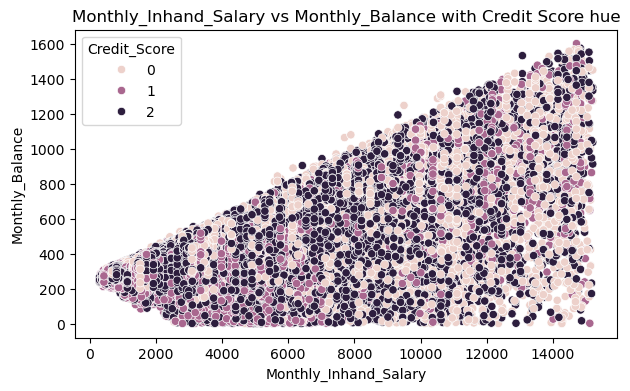

c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


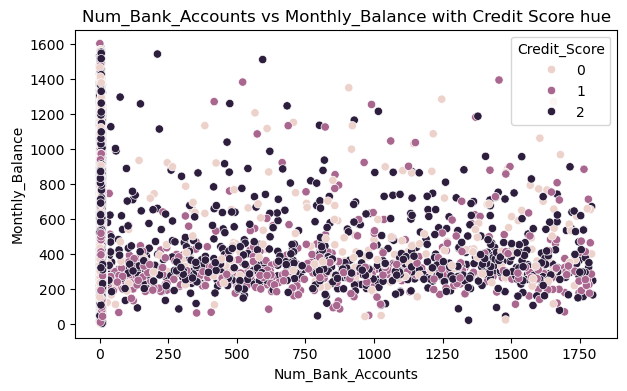

c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


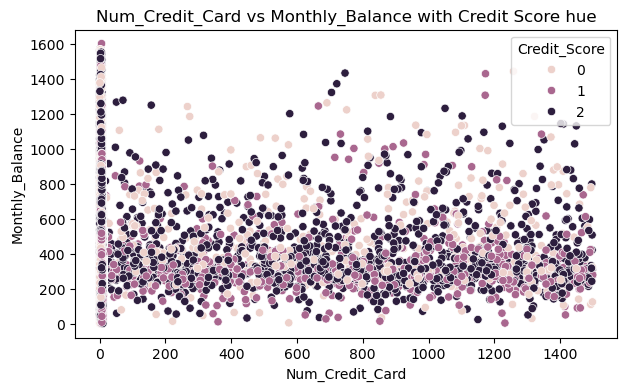

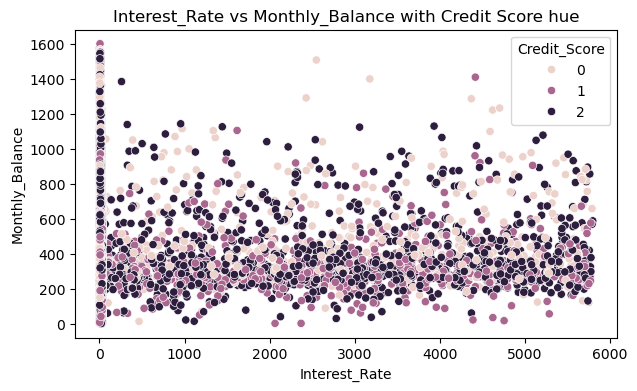

c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


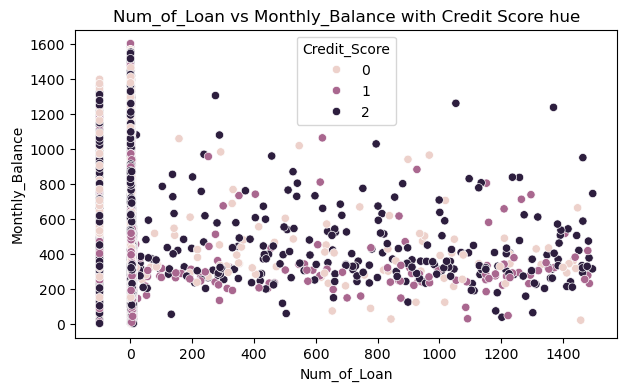

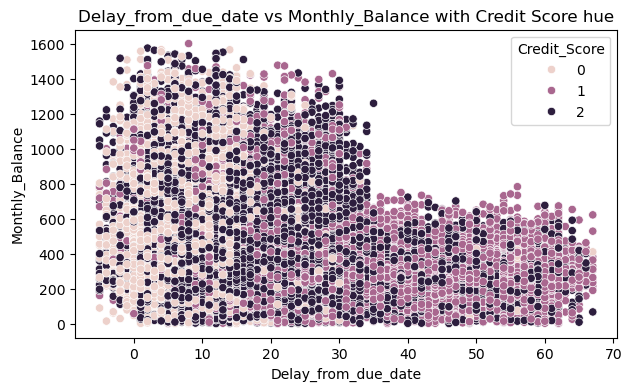

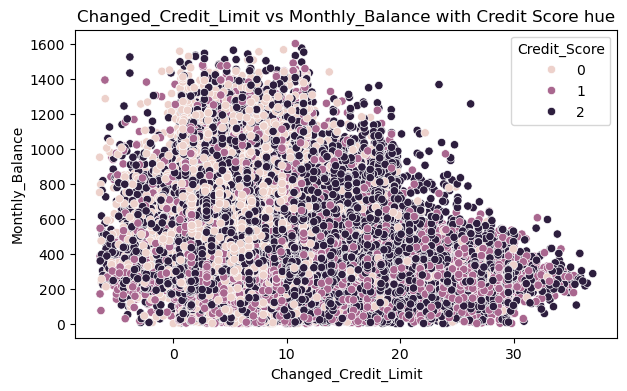

c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


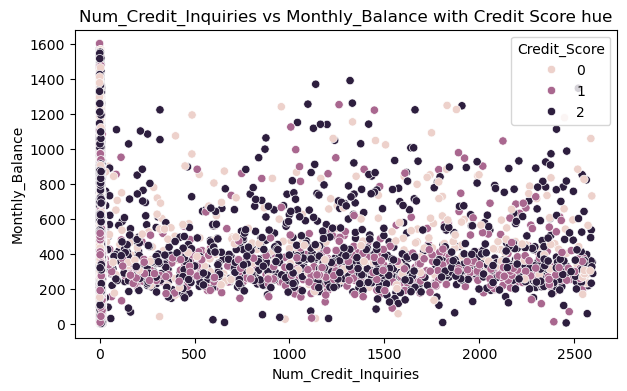

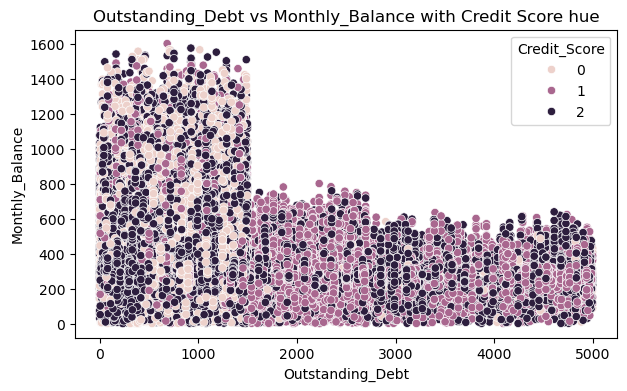

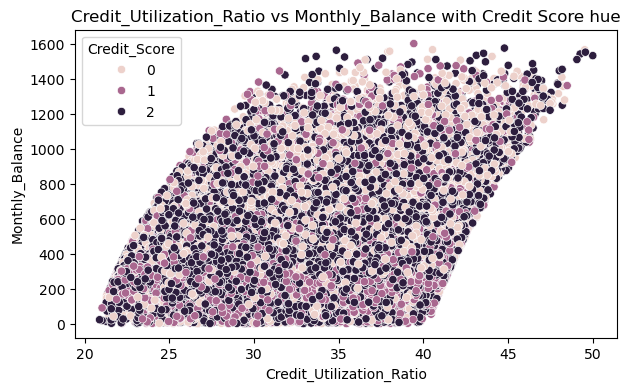

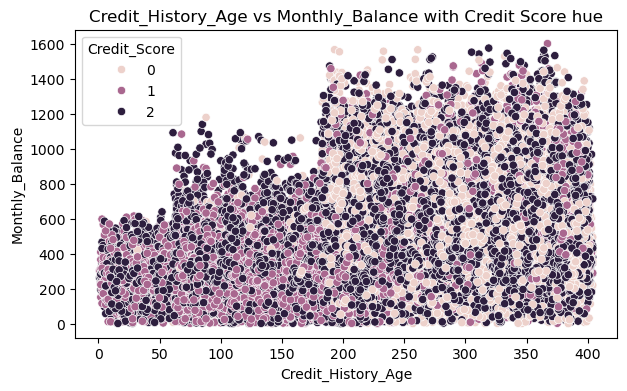

c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


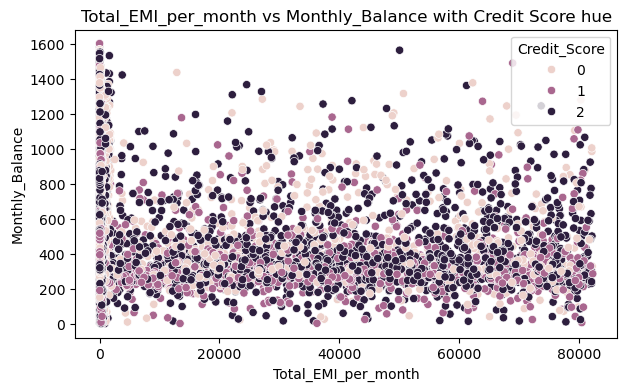

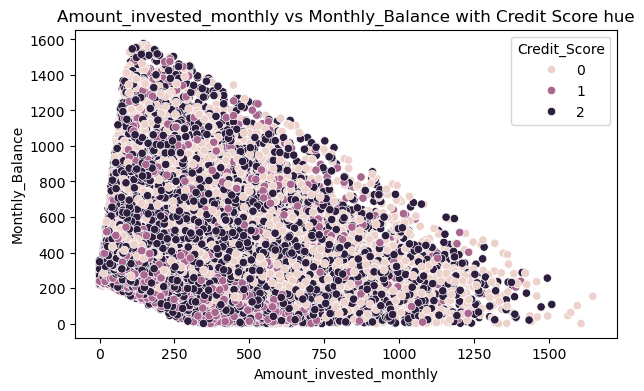

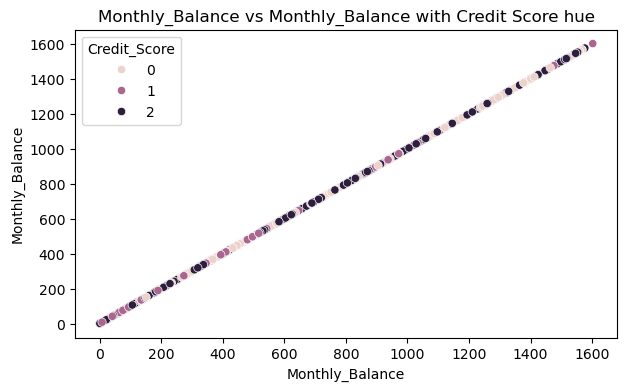

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_features:
    if col != "Credit_Score":   # avoid plotting target on x-axis
        plt.figure(figsize=(7,4))
        sns.scatterplot(data=df, x=col, y="Monthly_Balance", hue="Credit_Score")
        plt.title(f"{col} vs Monthly_Balance with Credit Score hue")
        plt.show()
